#Exercise 1 - Static Saliency

In this part of the project, you will start by exploring Static Saliency methods from OpenCV.

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# check if the saliency module is available
# if not, install the contrib package and restart the Jupyter kernel
# !pip install opencv-contrib-python
cv2.saliency

<module 'cv2.saliency' (<_frozen_importlib_external._NamespaceLoader object at 0x786f1c0084f0>)>

In OpenCV’s saliency module there are three primary forms of saliency detection:
* Static saliency: use features and statistics to localize the most interesting regions of an image
* Motion saliency: use video or frame-by-frame inputs and objects that move are considered salient
* Objectness: compute “objectness” and generate a set of “proposals” (bounding boxes)

OpenCV provides four implementations of saliency detectors with Python bindings, including:
* Cheng, Ming-Ming, et al. "BING: Binarized normed gradients for objectness estimation at 300fps." IEEE CVPR. 2014
  * cv2.saliency.ObjectnessBING_create()
* Hou and Zhang. "Saliency detection: A spectral residual approach." CVPR 2007
  * cv2.saliency.StaticSaliencySpectralResidual_create()
* Montabone and Soto. "Human detection using a mobile platform and novel features derived from a visual saliency mechanism." In Image and Vision Computing, 2010
  * cv2.saliency.StaticSaliencyFineGrained_create()
* Wang and Dudek. "A fast self-tuning background subtraction algorithm." CVPRW 2014
  * cv2.saliency.MotionSaliencyBinWangApr2014_create()

  You can find out more about this topic [here](https://docs.opencv.org/4.x/d8/d65/group__saliency.html)

Compare the aforementioned static saliency methods (StaticSaliencySpectralResidual and StaticSaliencyFineGrained) on an input image. Plot the resulting saliency maps before and after applying Otsu's threshold.

More information on Otsu's binarization at https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html.

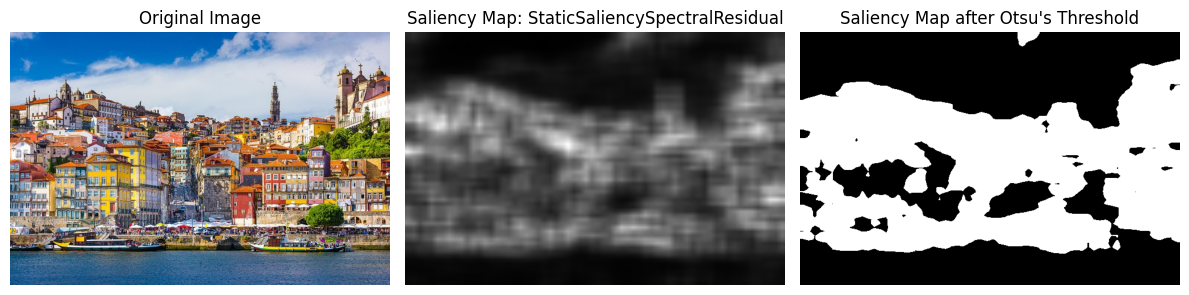

In [ ]:
# Saliency Method 1: StaticSaliencySpectralResidual

# read image (with opencv)
image = cv2.imread('porto.jpg')

# define saliency method
saliency_spectral = cv2.saliency.StaticSaliencySpectralResidual_create()

# compute saliency
success_spectral, saliency_map_spectral = saliency_spectral.computeSaliency(image)
saliency_map_spectral = (saliency_map_spectral * 255).astype(np.uint8)

# apply Otsu's threshold
_, thresholded_map_spectral = cv2.threshold(saliency_map_spectral, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# plot the results before and after thresholding (original image, saliency map and saliency map after applying Otsu's threshold)
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title(f'Saliency Map: StaticSaliencySpectralResidual')
plt.imshow(saliency_map_spectral, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Saliency Map after Otsu\'s Threshold')
plt.imshow(thresholded_map_spectral, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


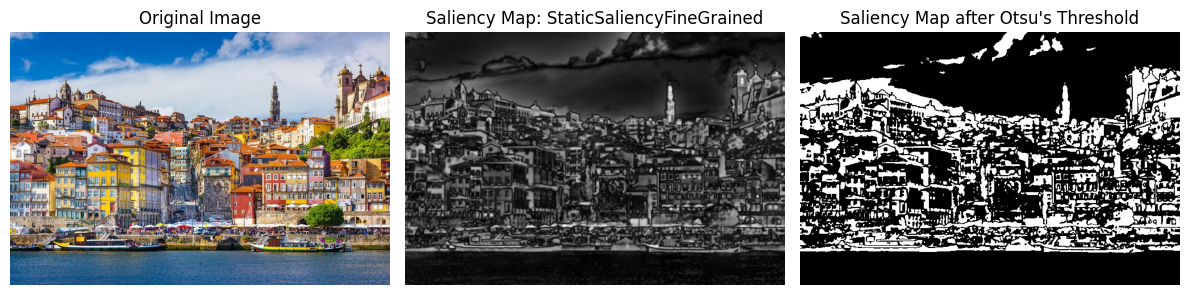

In [ ]:
# Saliency Method 2: StaticSaliencyFineGrained
# read image (with opencv)
image = cv2.imread('porto.jpg')

# define saliency method
saliency_fine_grained = cv2.saliency.StaticSaliencyFineGrained_create()

# compute saliency
success_fine, saliency_map_fine = saliency_fine_grained.computeSaliency(image)
saliency_map_fine = (saliency_map_fine * 255).astype(np.uint8)

# apply Otsu's threshold
_, thresholded_map_fine = cv2.threshold(saliency_map_fine, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# plot the results before and after thresholding (original image, saliency map and saliency map after applying Otsu's threshold)
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title(f'Saliency Map: StaticSaliencyFineGrained')
plt.imshow(saliency_map_fine, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Saliency Map after Otsu\'s Threshold')
plt.imshow(thresholded_map_fine, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


# Exercise 2 - Learnable Attention

This part of the project is about the comparison between additive attention and scaled dot-product attention.

Consider the simplest cases in both attention mechanisms (i.e. a single head, no masking strategy, etc).


Start by implementing scaled dot product attention.


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# add more imports here

In [7]:
class ScaledDotProductAttention(nn.Module):
    def __init__(self):
        super(ScaledDotProductAttention, self).__init__()
        ### Write your code here ###

    def forward(self, query, key, value):

        d_k = key.size(-1) #gets size of the last dimension of keys
        #performs: query*key^T/sqrt(d_k)
        scores = torch.matmul(query, key.transpose(-2, -1)) / torch.sqrt(torch.tensor(d_k, dtype=torch.float32))
        #applies softmax (normalizes scores) to get attention weights
        attention_weights = F.softmax(scores, dim=-1)
        #computes weighted sum of value
        output = torch.matmul(attention_weights, value)

        return output


In [8]:
queries = torch.normal(0, 1, (1, 1, 2))
keys = torch.normal(0, 1, (1, 10, 2)) #10 vectors in key value dictionary
values = torch.normal(0, 1, (1, 10, 4))
attention = ScaledDotProductAttention()
output = attention(queries, keys, values)
print(output.shape)

torch.Size([1, 1, 4])


What happens if the queries and keys have different vector lengths?




In [ ]:
queries = torch.normal(0, 1, (1, 1, 20))
attention = ScaledDotProductAttention()
output = attention(queries, keys, values)
print(output.shape)

#see if it throws an error or if it works
#The result was "RuntimeError: Expected size for first two dimensions of batch2 tensor to be: [1, 20] but got: [1, 2]."


RuntimeError: Expected size for first two dimensions of batch2 tensor to be: [1, 20] but got: [1, 2].

In [15]:
class AdditiveAttention(nn.Module):
    def __init__(self, query_dim, key_dim, value_dim, hidden_size=128):
        super(AdditiveAttention, self).__init__()
        ### Write your code here ###
        self.hidden_size = hidden_size
        self.query_layer = nn.Linear(query_dim, hidden_size)
        self.key_layer = nn.Linear(key_dim, hidden_size)
        self.energy_layer = nn.Linear(hidden_size, 1)
        self.tanh = nn.Tanh()

    def forward(self, queries, keys, values):
        #projects queries and keys into the hidden space
        queries_proj = self.query_layer(queries)
        keys_proj = self.key_layer(keys)
        #print("queries_proj: ", queries_proj.shape)
        #print("keys_proj: ", keys_proj.shape)

        #computes the additive attention scores
        scores = self.energy_layer(self.tanh(queries_proj + keys_proj))
        #print("scores: ", scores.shape)

        scores = scores.squeeze(-1)  # Remove the last dimension

        #applies softmax to get the attention weights
        attention_weights = F.softmax(scores, dim=-1)

        #calculates weighted sum of the values
        attention_weights = attention_weights.unsqueeze(-1)  # adds the dimension again
        output = torch.sum(attention_weights * values, dim=1)

        return output

In [16]:
queries = torch.normal(0, 1, (1, 1, 2))
keys = torch.normal(0, 1, (1, 10, 2))
values = torch.normal(0, 1, (1, 10, 4))

query_dim= queries.size(-1)
key_dim= keys.size(-1)
value_dim= values.size(-1)

attention = AdditiveAttention(query_dim=query_dim, key_dim=key_dim, value_dim=value_dim, hidden_size=8)
output = attention(queries, keys, values)
print(output.shape)

queries_proj:  torch.Size([1, 1, 8])
keys_proj:  torch.Size([1, 10, 8])
scores:  torch.Size([1, 10, 1])
torch.Size([1, 4])


What happens if the queries and keys have different vector lengths?


In [17]:
#what happens now? using additive attention
queries = torch.normal(0, 1, (1, 1, 20))
query_dim= queries.size(-1)

attention = AdditiveAttention(query_dim=query_dim, key_dim=key_dim, value_dim=value_dim, hidden_size=8)
output = attention(queries, keys, values)
print(output.shape)

queries_proj:  torch.Size([1, 1, 8])
keys_proj:  torch.Size([1, 10, 8])
scores:  torch.Size([1, 10, 1])
torch.Size([1, 4])


# Exercise 3 - Visualization of Attention Maps of ViT

In this exercise, the objective is to visualize the attention maps for a given image. For this we will use a Vision Transformer pretrained on ImageNet.

Start by loading the [google/vit-base-patch16-224](https://huggingface.co/google/vit-base-patch16-224) model (using Huggingface's Transformers library) and the corresponding image processor (i.e. the transforms this model uses to preprocess the images).

In [2]:
!pip install transformers==4.40 # there is a problem with version 4.41 that prevents the attention maps from being correctly returned

In [33]:
# load the model (see the link above to help load the model)
import torch
from transformers import ViTModel, ViTFeatureExtractor
from PIL import Image
import requests
import matplotlib.pyplot as plt
import numpy as np

model_name = "google/vit-base-patch16-224"
model = ViTModel.from_pretrained(model_name, output_attentions=True)
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name) #image processor

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


Now load a test image, pass it through the model and collect the attention maps (check out what the forward function of the [ViTForImageClassification](https://huggingface.co/docs/transformers/v4.41.2/en/model_doc/vit#transformers.ViTForImageClassification) can return).

Shape (1280, 1278)


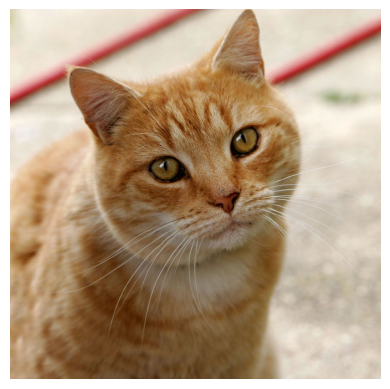

In [38]:
from PIL import Image
import torch

img = Image.open('cat.jpg')
plt.imshow(img)
plt.axis('off')
print("Shape", img.size)

In [39]:
# give image to the model and collect the attention maps
#(see the link above for some help). taking into account the input parameters and also what it outputs

inputs = feature_extractor(images=img, return_tensors="pt")
outputs = model(**inputs)
attention_maps = outputs.attentions


After having the attention maps, plot the attention maps of each attention head (use the CLS token of the last layer of the ViT).

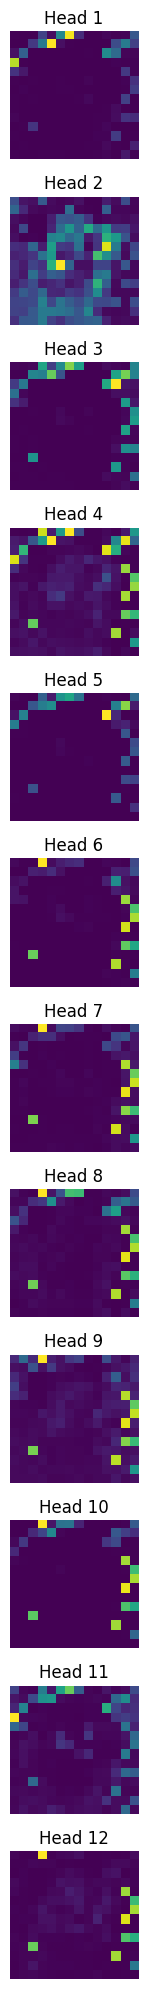

In [42]:
# Extract attention maps of the last layer
last_layer_attention = attention_maps[-1]

# CLS token: the first token, we get its attention weights
cls_attention = last_layer_attention[0, :, 0, 0]  # First token in the sequence

# Plot attention maps for each head
num_heads = cls_attention.size(0)
fig, axes = plt.subplots(num_heads, 1, figsize=(5, 20))

for i, ax in enumerate(axes.flat):
    attn_map = last_layer_attention[0, i, 0, 1:].detach().numpy()
    attn_map = attn_map.reshape((14, 14))
    ax.imshow(attn_map, cmap='viridis')  #resizing
    ax.set_title(f'Head {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

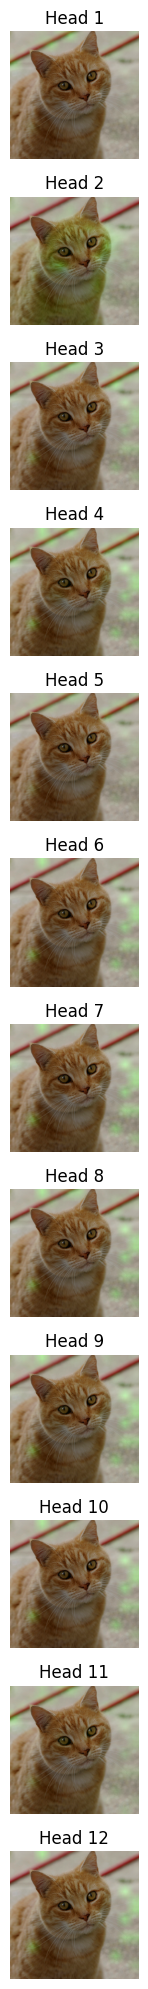

In [43]:
# get the attention from the last layer
#(in the attentions method indicate that sequence_length=CLS token+number of patches the image was divided into)

# iterate over the heads and obtain the CLS token #(the first token in the sequence)
# resize the attention map to the image size
# plot the attention map of each head superimposed with the input image
#----------------------------------------------------------------------

#attention maps of the last layer
last_layer_attention = attention_maps[-1] #(batch_size, attention_head_size, height dim, width dim)
#print("1: ", last_layer_attention.shape) #torch.Size([1, 12, 197, 197])
#197 = 196 patches + 1
#sqrt(196)=14

# get the CLS token attention
cls_attention = last_layer_attention[0, :, 0, 1:]

#reshape cls_attention to (num_heads, height, width)
num_heads = cls_attention.size(0)
patch_size = int((cls_attention.size(1) ** 0.5) // 1) #sqrt
cls_attention = cls_attention.view(num_heads, patch_size, patch_size)

#resize: expects the input tensor to have dimensions in the format (N, C, H, W)
resized_attention_maps = torch.nn.functional.interpolate(cls_attention.unsqueeze(0), size=(img.size[1], img.size[0]), mode='bilinear', align_corners=False).squeeze(0)

fig, axes = plt.subplots(num_heads, 1, figsize=(10, 20))


for i, ax in enumerate(axes):
    attn_map = resized_attention_maps[i].detach().numpy()
    #print("size:",  attn_map.shape)

    # Normalize attention map values between 0 and 1
    attn_map = (attn_map - attn_map.min()) / (attn_map.max() - attn_map.min())

    # Convert the attention map to RGBA format
    attn_map_rgba = np.zeros((img.size[1], img.size[0], 4))
    attn_map_rgba[:, :, 1] = attn_map  # Set G channel to attention values
    attn_map_rgba[:, :, 3] = 0.5  # Set alpha channel to desired transparency

    # Display the input image
    ax.imshow(img)

    # Display the attention map as an overlay
    ax.imshow(attn_map_rgba, alpha=0.5)
    ax.set_title(f'Head {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

